<h1> Sistemas de Ecuaciones </h1>

\begin{equation} 
\left\{
\begin{split}
 \frac{dy_1}{dx}(x)&=f_1(x,y_1(x),\ldots,y_n(x))\\
  \frac{dy_2}{dx}(x)&=f_2(x,y_1(x),\ldots,y_n(x))\\
       &\,\,\vdots                                   \\
 \frac{dy_n}{dx}(x)&=f_n(x,y_1(x),\ldots,y_n(x))\\
\end{split}\right., \tag{$NL_1$}
\end{equation}


Una manera alternativa y compacta de denotar un sistema se logra introduciendo las funciones $y=(y_1,\ldots,y_n)$  y $f=(f_1,\ldots,f_n)$. Entonces $y:[a,b]\to\mathbb{R}^n$ es una función con valores en $\mathbb{R}^n$ y $f:[a,b]\times \mathbb{R}^n\to\mathbb{R}^n$ es un campo vectorial dependiente de $x$. Con estas notaciones el sistema se escribe:
\begin{equation}
 y'(x)=f(x,y(x)).\tag{$NL_2$}
\end{equation}


**Ejemplo: Ecuaciones de Lotka-Volterra**
 En 1925 y 1926, Alfred J. Lotka y Vito Volterra respectivamente, introdujeron
 las [ecuaciones de Lotka-Volterra](https://es.wikipedia.org/wiki/Ecuaciones_Lotka%E2%80%93Volterra). Dinámica de presas predadores.
 
 \begin{equation} 
\left\{
\begin{split}
 x'(t) &= x(t) ( \alpha - \beta  y(t) )\\
  y'(t)&=-y(t)(\gamma-\delta x(t))\\
\end{split}\right.\tag{LV}
\end{equation}
La variable $y$ representa el número de individuos de algún predador (por ejemplo, un lobo) y $x$ es el número de sus presas (por ejemplo, conejos), $t$ representa el tiempo; y  $\alpha,\beta,\gamma$ y $\delta$ son parámetros (positivos)



<h1> Sistemas de ecuaciones y ecuaciones de orden superior </h1>

<h2> Ecuación de orden n a sistema de n ecuaciones </h2>

Supongamos la ecuación

$$y^{(n)}=f(x,y,y',\ldots,y^{(n-1)}).$$

Escribamos:

$$y_1=y,\, y_2=y',\,y_3=y'',\ldots, y_{n}=y^{(n-1)}.$$

Entonces 
\begin{equation}
\left\{
\begin{array}{l l l}
 y_1'(x)&=y_2(x)\\
  y_2'(x)&=y_3(x)\\
       &\,\,\vdots\\
  y_{n-1}'(x)&=y_n(x)\\
 y_n'(x)&=f(x,y_1(x),\ldots,y_n(x))\\
\end{array}\right.,
\end{equation}

<h2> Sistema de n ecuaciones a ecuación de orden n   </h2>

Reciprocamente, supongamos que $y_1,\ldots,y_n$ resuelven  ($NL_1$). Por simplicidad vamos a suponer que las $f_j$ son independientes de $x$.

 Se toma $y=y_n$ (podríamos usar cualquier $y_j$, $j=1,\ldots,n$). Ahora derivamos sucesivamente $n$-veces respecto a $x$ la ecuación para $y_n$,  y reemplazamos cada derivada $y_j'$ por $f_j$ (vamos a omitir los argumentos de $f_j$ que son en todos los casos $(y_1,\ldots,y_n)$):

$$
\begin{array}{lll}
y_n'(x) =& f_n(y_1,\ldots,y_n) &= g_1(y_1,\ldots,y_n)\\
 y_n''(x)=&\sum\limits_{j=1}^n\frac{\partial f_n}{\partial y_j}f_j
 & = g_2(y_1,\ldots,y_n)\\
  y_n'''(x)=&\sum\limits_{k,j=1}^n\frac{\partial^2 f_n}{\partial y_k \partial y_j}f_kf_j+
  \sum\limits_{k,j=1}^n\frac{\partial f_n}{\partial y_j}\frac{\partial f_j}{\partial y_k}f_k & = g_k(y_1,\ldots,y_n)\\
  &\,\,\vdots &\,\,\vdots \\
  y^{(n)}_n(x) =&\cdots & = g_n(y_1,\ldots,y_n)
  \\
\end{array}
$$


Las igualdades anteriores tienen la estructura $z=G(y)$, donde $y=(y_1,\ldots,y_n)$, $z=(y_n',y_n'',\ldots,y_n^{(n)})$ y $G=(y_1,\ldots,y_n)$. Si la función $G:\mathbb{R}^n\to\mathbb{R}^n$ es invertible y escribimos $H=G^{-1}$ entonces
$$y_n=H_n(z)=H_n(y_n',y_n'',\ldots,y_n^{(n)}).$$
La anterior es una ecuación escalar de orden $n$ para $y_n$. Por consiguiente hemos logrado reducir el sistema de $n$-ecuaciones a una ecuación de orden $n$. Observar que si resolvemos esta ecuación, encontrando $y_n$, podemos hallar el resto de las incognitas $y_j$, $j=1,\ldots,n-1$,  usando que $y_j=H_j(y_n',y_n'',\ldots,y_n^{(n)})$.


**Ejemplo: Ecuaciones de Lotka-Volterra.** Reduzcamos las ecuaciones de Lotka-Volterra a una ecuación de orden 2 y luego revirtamos el camino.

La primera parte la resolvemos con Sympy:



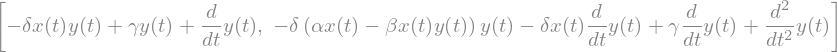

In [1]:
from sympy import *
init_printing()
t=symbols('t')
y=Function('y')(t)
x=Function('x')(t)
alpha,beta,gamma,delta=symbols('alpha,beta,gamma,delta',positive=True)

#Campo vectorial
f1=alpha*x-beta*x*y
f2=-gamma*y+delta*x*y 


ec2=y.diff()-f2


##Derivamos 1 vez la segunda
ec2b=ec2.diff(t)

# Sustituímos $x'$ por $f_1$
ec2c=ec2b.subs(x.diff(),f1)

[ec2,ec2c]


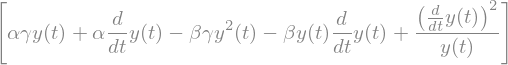

In [2]:
#No funciona solve([ec2,ec2c],[x,y])

X=solve(ec2,x)
h=ec2c.subs(x,X[0]).simplify()
solve(h,y.diff(t,2))


Resulta en
\begin{equation}
y''(t)=
\alpha \gamma y{\left(t \right)} + \alpha \frac{d}{d t} y{\left(t \right)} - \beta \gamma y^{2}{\left(t \right)} - \beta y{\left(t \right)} \frac{d}{d t} y{\left(t \right)} + \frac{\left(\frac{d}{d t} y{\left(t \right)}\right)^{2}}{y{\left(t \right)}}
\end{equation}

El camino inverso es más sencillo. Llamamos $z=y'$. Usando las variables $y,z$ la ecuación se escribe
$$
 \left\{
 \begin{array}{ll}
    y'(t)&=v(t)\\
    v'(t)&=\alpha \gamma y{\left(t \right)} + \alpha \frac{d}{d t} y{\left(t \right)} - \beta \gamma y^{2}{\left(t \right)} - \beta y{\left(t \right)} \frac{d}{d t} y{\left(t \right)} + \frac{v^{2}}{y{\left(t \right)}}
 \end{array}
 \right.
 $$

 No llegamos a la ecuación de partida. Hay que tener presente que una ecuación tiene diferentes representaciones en diferentes variables y que las variables que hemos elegido para el camino de vuelta $y,v$, no son las originales del problema $y,x$.


<h1> Representación gráfica de soluciones </h1>


Un sistema de ecuaciones tiene asociado una familia de curvas <span style="color:blue"> trayectorias </span> en el espacio $\mathbb{R}^n$ que contiene las variables "espacio-temporales" $t,x_1,\ldots,x_n$. 

Con la yuda de numpy, la función odeint de scipy  y matplotlib podemos graficar algunas de esas curvas 

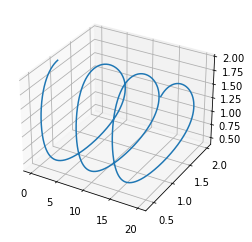

In [4]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt


def LotkaVolterra(X,t,alpha,beta,gamma,delta):
    x,y=X
    f1=alpha*x-beta*x*y
    f2=-gamma*y+delta*x*y 
    return [f1,f2]


t=np.arange(0,20,.01)
X0=[1,2]
sol=odeint(LotkaVolterra, X0,t,args=(1,1,1,1))

ax = plt.figure().add_subplot(projection='3d')

ax.plot(t,sol[:,0],sol[:,1])

<h1> Sistema autónomos </h1>


Una ecuación
\begin{equation} 
    x'(t)=f(x(t)),\tag{$SA$}
\end{equation}
donde $\Omega$ es un subconjunto abierto de $\mathbb{R}^n$ y $
f:\Omega\to\mathbb{R}^n$, se denomina <span style="color:blue"> ecuación autónoma </span>. De
ahora en más asumiremos que $f$ es de clase $C^1$ en $\Omega$, de
modo que para cada $(t_0,x^0)\in\mathbb{R}\times\Omega$ existe una
solución $\varphi(t)$ que pasa por $(t_0,x^0)$.

Las soluciones a ecuaciones autónomas tienen la siguiente  propiedad.

**Ejercicio** Si $\varphi$ es solución de ($SA$)
entonces $\psi(t)=\varphi(t+c)$ es también solución 


Vemos así que toda trasladada, sobre el eje $t$, de una solución
es también solución. 

Si $x^0\in\Omega$ satisface que $f(x^0)=0$
entonces $\varphi(t)\equiv x^0$ es una solución. Dado que esta solución
no experimenta cambios con el tiempo, $x^0$ se denomina
<span style="color:blue"> punto de equilibrio </span>. 

 

**Ejercicio** a) Si $\varphi$ y $\psi$ son soluciones de
($SA$) y $\varphi(t_0)=\psi(t_1)$ entonces existe un $c\in\mathbb{R}$
tal que $\varphi(t)=\psi(t+c)$.
b) Si $\varphi$ es solución de ($SA$)  y
$\varphi(t_0)=\varphi(t_1)$ para ciertos $t_0\neq t_1$ entonces $\varphi$ es
$T$-periódica, $T=t_1-t_0$.


El espacio $\mathbb{R}^n$ donde viven las variables $x=(x_1,\ldots,x_n)$ se denomina <span style="color:blue"> espacio de fases </span>. En los sistemas autónomos es clarificador graficar las soluciones en el espacio de fases, esto se denomina <span style="color:blue"> trayectoria de fase </span>. De este modo perdemos la información de como varían las soluciones con el tiempo. Es como la estela que deja un avión en el cielo luego de su paso, uno ve la trayectoria que siguió pero desconoce el momento exacto donde el avión estuvo en cada lugar de la estela. Sin embargo es muy útil este tipo de gráfico en sistemas autónomos puesto que por los ejercicios anteriores en un sistema autónomo vale que 
<span style="color:blue"> dos trayectorias de fases o son iguales o no se cortan </span>. El gráfico de las trayectorias de fases se denomina <span style="color:blue"> retrato de fases </span>.

**Ejemplo** Si convertimos la ecuación del péndulo no lineal 
$$\theta''=-\operatorname{sen}(\theta)$$
queda
$$
\left\{
        \begin{array}{ll}
        \theta'&=v\\
        v'&= -\operatorname{sen}(\theta)
        \end{array}
\right.
$$

Usar Python para graficar el retrato de fases



In [8]:
def Pendulo(X,t):
    theta,v=X
    f1=v
    f2=-theta
    return [f1,f2]


t=np.arange(0,20,.01)

ax = plt.figure().add_subplot()

%matplotlib inline
for v0 in np.linspace(0,3,10):
    X0=[0,v0]
    sol=odeint(Pendulo, X0,t)
    ax.plot(sol[:,0],sol[:,1])
plt.show()

Otro gráfico útil es el <span style="color:blue"> campo de direcciones </span>. No es más que el gráfico del campo vetorial $f:\mathbb{R}^n\to \mathbb{R}^n$. Como $x'(t)=f(x(t))$ en todo momento la curva es tangente al campo

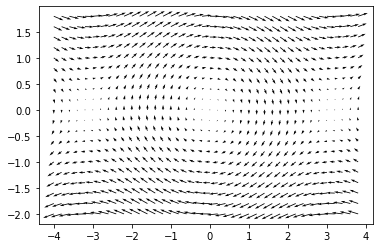

In [94]:
delta = 0.2
theta = np.arange(-4.0, 4.0, delta)
v = np.arange(-2.0, 2.0, delta)
Theta, V = np.meshgrid(theta, v)
fig, ax = plt.subplots()
F1=V
F2=-np.sin(Theta)
ax.quiver(Theta, V, F1,F2)
plt.show()

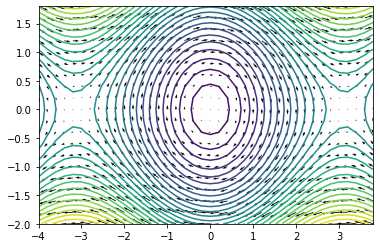

In [95]:
Z = .5*V**2-np.cos(Theta)
fig, ax = plt.subplots()
ax.quiver(Theta, V, F1,F2)
CS = ax.contour(Theta, V, Z,30)
plt.show()

<h1> Técnicas elementales de solución</h1> 

    1) Encontrar integrales primeras.
∇𝐸1,…,∇𝐸∇𝐸1,…,∇𝐸
>

>

>

    2) Estudiar las simetrías de la ecuación.
    
    3) Transformar el sistema por un cambio de variables.

<h2> Integrales Primeras </h2> 
Una <span style="color:blue"> integral primera </span> es una función $E(t,x_1,\ldots,x_n)$ de las variables de estado y el tiempo que es constante a lo largo de soluciones de ($NL_1$). 

Si uno consiguiera $n$ de estas integrales primeras $E_1,\ldots,E_n$ las soluciones satisfacerían 
$$
\left\{
        \begin{array}{ll}
             E_1(t,x_1,\ldots,x_n)&=c_1\\
             \vdots   &= \vdots\\
             E_n(t,x_1,\ldots,x_n)&=c_n\\
         \end{array}
\right.
$$

Si las funciones $E_1,\ldots,E_n$ son <span style="color:blue"> funcionalmente independientes </span> vale decir los vectores $\nabla E_1,\ldots,\nabla E_n$
 son linealmente independientes ($\nabla = \left(\frac{\partial}{x_1},\ldots,\frac{\partial}{x_n}\right)$)  y si al menos alguna $E_j$ depende explícitamente de $t$ se puede usar el Teorema de la función  implícita para encontrar la solución.

Para que una función sea integral primera la <span style="color:blue">derivada total </span> respecto al tiempo debe ser nula
$$
\frac{d E}{d t} \equiv \frac{\partial E}{\partial t}+\sum_{i=1}^n \frac{\partial E}{\partial x_i} f_i=0
$$
    
**Ejercicio** En el sistema $\dot{x}=y, \dot{y}=x$, las funciones $E_1=e^{-t}(x+y)$, $e^{-t}(x+y)$ y $e^t(x-y)$ y $x^2-y^2$ son integrales primeras. Resolver.

Muchos sistemas de la física  provienen de llevar un sistema de ecuaciones de segundo orden

$$x''(t)=f(x(t))$$

a un sistema de primer orden escribiendo $v=x'$

$$
\left\{
        \begin{array}{ll}
             x'(t)&=v(t)\\
             v'(t)&=f(x(t))\\
         \end{array}
\right.
$$


El campo $f$ es conservativo $f=-\nabla U$ entonces 
$$
E=\frac12\|v\|^2+U(x),
$$
es integral primera, pues
$$
\frac{dE}{dt}=v\cdot v'+\nabla U\cdot x'=-v\cdot  \nabla U+\nabla U\cdot v=0.
$$

**Ejemplo** en un péndulo no lineal $E=\frac12\dot{\theta}^2-\cos(\theta)$ es integral primera. En un sistema autónomo plano, una integral primera permite graficar el retrato de fases como las curvas de nivel de $E$.  Ver arriba el caso del péndulo. 


<h1> Simetrías en la ecuación </h1> 

Una simetría es un cambio de variables que deja el sistema de ecuaciones inalterado. 

El [Teorema de Noether](https://es.wikipedia.org/wiki/Teorema_de_Noether) dice que en un sistema de ecuaciones de Euler-Lagrange un conjunto de simetrías que forman una estructura algebraica que se llama grupo determina una integral primera. Por ejemplo la invarianza por traslaciones lleva a la conservación del momento lineal, en cambio la invarianza por rotaciones nos da la conservación del momento angular. Cuando la ecuación es autónoma es invariante por traslaciones del tiempo y esto nos lleva a la conservación de la energía.

Sin  apelar  a tan profundo Teorema las simetrías permiten que conociendo algunas soluciones, puedan hallar otras por ser simétricas. 

**Ejemplo**
 
\begin{equation}
\left\{%
\begin{array}{l}
    x_1'=\operatorname{sen}(x_1) \\
    x_2'=-\operatorname{sen}(x_2) \\
\end{array} .%
\right.\tag{$1$}
\end{equation}

El sistema tiene puntos de equilibrio en $(n\pi,m\pi)$, $n,m\in\mathbb{Z}$. Las curvas de fases se reducen a puntos.


**Ejercicio** S $(x_1,x_2)$ resuelve (1) entonces $(x_1+2n\pi,x_2+2m\pi)$,
$n,m\in\mathbb{Z}$ y $(x_2+\pi,x_1+\pi)$, $(2\pi-x_1,x_2)$ y $(x_1,2\pi-x_2)$ también lo resuelven. 

Así  suficiente hacer el retrato de fases en la caja  $[0,\pi]\times[0,\pi]$. 

El sistema está desacoplado, para $x_1$ tenemos la ecuación:
$$
    \frac{dx_1}{\operatorname{sen} x_1}=1.
$$

Integrando y haciendo la sustitución $s=\tan(\frac{x_1}{2})$
obtenemos
$$ x_1(t)=2\arctan (ae^t),\quad a>0$$

De manera similar para $x_2$
$$ x_2(t)=2\arctan (be^{-t}),\quad b>0$$

También tenemos las soluciones $x_1,x_2=\pm\pi$. De la expresiones
se deduce que si $(x_0,y_0)\in[0,\pi]\times[0,\pi]$ entonces
$(x_1(t),x_2(t))\in[0,\pi]\times[0,\pi]$ para todo $t$.  Cuando
$t\to -\infty$, $x_1\to 0$ e $x_2(t)\to\pi$ y cuando $t\to
+\infty$, $x_1\to \pi$ e $x_2(t)\to 0$. 

<img src="senos.png"  width=50% height=50%>


<h2> Cambios de coordenadas </h2> 

Muchas veces un cambio de coordenadas, ya sea la independiente o las dependientes lleva a la ecuación a otra más simple o que sabemos resolver. Los cambios de coordenadas estan relacionados también con las simetrías, nuevamente la Teoría de los Grupos de Lie permite encontrar cambios de variables que simplifican las ecuaciones a partir de simetrías (ver apunte Ecuaciones Diferenciales 1913).

Sólo expondremos un ejemplo.

**Ejemplo**



\begin{equation}
\left\{%
\begin{array}{l}
    x_1'=-x_2+x_1(x_1^2+x_2^2-1) \\
    x_2'=x_1+ x_2(x_1^2+x_2^2-1)\\
\end{array} .%
\right.\tag{2}
\end{equation}


Usaremos coordenadas polares 

$$x_1=r\cos \theta,\quad x_2=r\operatorname{sen} \theta.$$

Se tiene
$$
    \begin{split}
    r'&=\frac{x_1x_1'+x_2x_2'}{r}\\
    \theta'&=\frac{x_1x_2'-x_1'x_2}{r^2}
    \end{split}.
$$

Sustituyendo en la ecuación (2) obtenemos
\begin{equation}
\left\{%
\begin{array}{l}
    r'=r(r^2-1) \\
    \theta'=1\\
\end{array} ,%
\right.
\end{equation}

que es un sistema desacoplado y fácil de resolver, obteniendo para
$\theta$ la solución:
$$
    \theta(t)=t+a.
$$
Para $r$ tenemos, entre otras,  las soluciones 
$$r\equiv 1,\quad r\equiv 0.$$
La primera de ellas junto con $\theta=t+a$ determinan la circunferencia de radio uno y centro en el origen, la segunda el equilibrio $(x_1,x_2)\equiv(0,0)$. 

Observar que, puesto que las trayectorias no se cruzan, una solución que empieza dentro de la bola unidad cerrada $B_1$ permanece allí por siempre. Si  resolvemos $r$ obtenemos
$$
r(t)=\sqrt{\frac{1}{1+ce^{2t}}},
$$
cuando $c\geq 0$ estamos en $B_1$ y cuando $c<0$ estamos fuera. Si
$c<0$ las soluciones están definidas (recordar que $r$ debe ser no
negativo) en el intervalo $(-\infty,-\ln\sqrt{|c|})$. De la
ecuación $r'=r(r^2-1)$, o de su solución explícita, concluimos que
$r$ es decreciente cuando $0<r<1$ y es creciente cuando $1<r$,
además se ve fácilmente que $\lim_{t\to -\infty}r(t)=1$ y
$\lim_{t\to +\infty}r(t)=0$, cuando $c>0$, y $\lim_{t\to
-\infty}r(t)=1$ y $\lim_{t\uparrow -\ln \sqrt{|c|}}r(t)=+\infty$,
cuando $c<0$. Como $\theta$ crece linealmente (una partícula que
se mueva según la ecuación tiene velocidad angular respecto al
origen constante) vemos que las soluciones (salvo $r\equiv 1$ y
$r\equiv 0$) son espirales que convergen a $0$ ($c>0$) o infinito
($c<0$). 


<img src="RetraFasesEspirales.png"  width=50% height=50%>


Escribamos el campo $f$ de este ejemplo  como $f_1+f_2$ donde
$$
    f_1=\begin{pmatrix} -x_2\\ x_1\end{pmatrix}\quad\hbox{y}\quad f_2
    =\begin{pmatrix} x_1(r^2-1)\\ x_2(r^2-1)\end{pmatrix}.
$$
La expresión $f_1+f_2$ es la descomposición de $f$ como suma de un
vector en la dirección de $(x_1,x_2)$ y el otro en una dirección
perpendicular a él (notar que $f_1 \bot f_2$ y $f_1$ tiene la
dirección de $(x_1,x_2)$). Luego  vemos que,si $r<1$,
$f_2$ actúa en la dirección opuesta a $(x_1,x_2)$, así $f_2$ fuerza
 a acercar la traayectoria al origen cuando $r<1$. Cuando $r>1$
la  $f_2$ rechaza la trayectoria. En tanto $f_1$  actúa en la
dirección que hace rotar la trayectoria con velocidad angular
constante.



    

